<a href="https://colab.research.google.com/github/Tejashree132/YouTube-Data-Collection-and-Analysis/blob/main/YouTube_Data_collection_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective:**

Aim to gather data on trending YouTube videos to understand what factors contribute to a video becoming popular.

The first step in this process is collecting the data using the **YouTube Data API**.

---

### **Step-by-Step Guide to Set Up the YouTube Data API:**

1. **Access Google Cloud Console**
   Go to: [https://console.cloud.google.com](https://console.cloud.google.com)

2. **Create a New Project**

   * Click the project drop-down at the top of the page.
   * Select **"New Project"**.
   * Provide a name for your project and click **"Create"**.

3. **Enable the YouTube Data API v3**

   * In the left sidebar, navigate to **"APIs & Services"** > **"Library"**.
   * Search for **"YouTube Data API v3"**.
   * Click on it and then click **"Enable"**.

4. **Generate API Credentials**

   * Go to **"APIs & Services"** > **"Credentials"**.
   * Click on **“+ CREATE CREDENTIALS”** and select **“API key”** from the dropdown.
   * A new API key will be generated — **copy and save it** securely.

---

Once the API key is ready, We can use it to authenticate requests to YouTube's API and start fetching trending video data.

### **1. collect data about the top 200 trending videos on YouTube**

In [1]:
import pandas as pd
from googleapiclient.discovery import build

# replace with your own API key
API_KEY = 'Your API KEY'

def get_trending_videos(api_key, max_results=200):
    # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US',
        maxResults=50
    )

    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos.csv


This code utilizes the YouTube Data API to gather comprehensive information on the top 200 trending videos in the United States. It handles the API’s pagination mechanism to retrieve all necessary data across multiple pages. For each video, the script extracts key details including the title, description, publication date, channel name, tags, video duration, resolution quality, caption availability, and viewer engagement metrics such as view count, like count, and comment count.

All the gathered information is stored in a structured list, which is then converted into a pandas DataFrame for easy manipulation and analysis. Finally, the DataFrame is exported to a CSV file titled trending_videos.csv, enabling further exploration of video trends and performance on the platform.

### **2. Data Read: what it contain**

In [4]:
#content of data what it holds
import pandas as pd
trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  ArIqryxHquo  Diddy Trial: Cassie's Testimony Breakdown With...   
1  jp3PLPkjmco  Joey Bada$$, Big Sean, Ab-Soul | Red Bull Spir...   
2  -5X2pt95cIo                        Nobody 2 | Official Trailer   
3  JrrOTZlqK7A                        mgk - iris feat. Julia Wolf   
4  xzqdZ0KaARE                 #BlackChicagoBeLikePart119🤔Part 35   

                                         description          published_at  \
0  CBS News' Jericka Duncan breaks down Cassie Ve...  2025-05-13T21:15:00Z   
1  Big Sean, Ab-Soul, and Joey Bada$$ Take On Red...  2025-05-13T16:00:53Z   
2  Nobody ruins his vacation. #Nobody2 hits theat...  2025-05-13T15:00:21Z   
3  mgk - iris feat. Julia Wolf (Cover)\nhttp://mg...  2025-05-13T20:00:07Z   
4  PRE-SAVE MY NEXT SINGLE "BOGUS" ‼️\n👉🏿 https:/...  2025-05-12T23:00:06Z   

                 channel_id          channel_title  category_id  \
0  UCdtXPiqI2cLorKaPrfpKc4g  Entertainment Tonigh

| **Column Name**  | **Description**                                                                   |
| ---------------- | --------------------------------------------------------------------------------- |
| `video_id`       | Unique identifier of the YouTube video.                                           |
| `title`          | Title of the video as displayed on YouTube.                                       |
| `description`    | Text description provided by the video uploader.                                  |
| `published_at`   | Date and time the video was published on YouTube (in ISO format).                 |
| `channel_id`     | Unique ID of the channel that uploaded the video.                                 |
| `channel_title`  | Display name of the channel that published the video.                             |
| `category_id`    | Numerical ID representing the video category (e.g., 24 = Entertainment).          |
| `tags`           | List of tags associated with the video, useful for SEO and categorization.        |
| `duration`       | Video length in ISO 8601 duration format (e.g., PT8M50S = 8 minutes, 50 seconds). |
| `definition`     | Video quality — usually `hd` (high definition) or `sd` (standard definition).     |
| `caption`        | Boolean indicating whether closed captions (subtitles) are available.             |
| `view_count`     | Total number of views the video has received.                                     |
| `like_count`     | Total number of likes on the video.                                               |
| `dislike_count`  | Total number of dislikes (now hidden on YouTube, but still part of API data).     |
| `favorite_count` | Always zero; legacy field not used in modern YouTube data.                        |
| `comment_count`  | Total number of user comments posted on the video.                                |


### **3. Check missing values and data types**

In [6]:
# check for missing values
missing_values = trending_videos.isnull().sum()
# display data types
data_types = trending_videos.dtypes
missing_values, data_types

(video_id          0
 title             0
 description       0
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

There is no any missing values.

The data types seem appropriate for most columns, but we may need to convert the published_at column to a datetime format and tags might need further processing.

### **4. Data Type Conversion and Preprocessing for published_at and tags Columns**

In [9]:
# convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])
# convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data_types = trending_videos.dtypes
data_types

,0
video_id,object
title,object
description,object
published_at,"datetime64[ns, UTC]"
channel_id,object
channel_title,object
category_id,int64
tags,object
duration,object
definition,object


### **5. Descriptive Statistics of Engagement Metrics**

In [10]:
# descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()
descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,2.000000e+02,2.000000e+02,200.0,200.000000
mean,2.832258e+06,9.256934e+04,0.0,6684.635000
std,9.352272e+06,4.437209e+05,0.0,34491.872976
min,3.672300e+04,1.420000e+02,0.0,0.000000
25%,3.725565e+05,1.268475e+04,0.0,1048.500000
50%,7.639675e+05,2.694200e+04,0.0,1853.000000
75%,1.765954e+06,5.234950e+04,0.0,4412.000000
max,1.072140e+08,5.883566e+06,0.0,480664.000000


### **6. Distribution of Engagement Metrics**

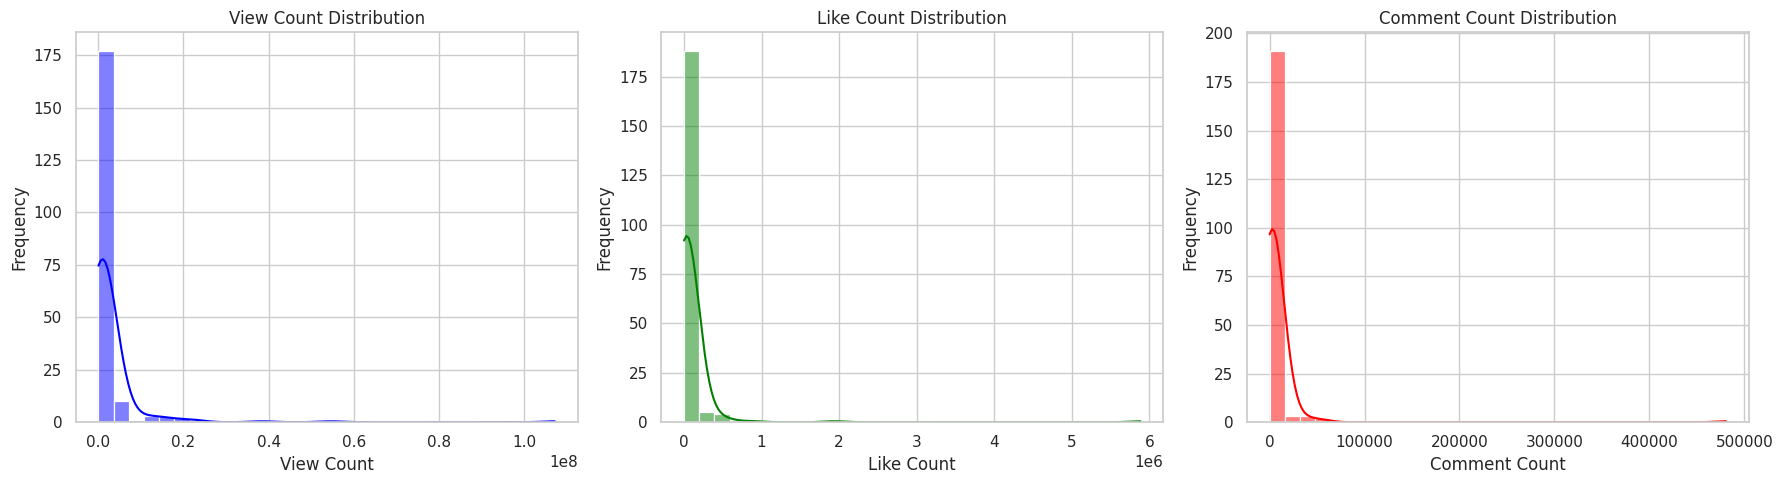

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **1. View Count Distribution (Left Plot)**

* **Color**: Blue
* **X-axis**: Number of views
* **Y-axis**: Frequency (how many videos fall into each view range)
* **Observation**:
  The majority of videos have lower view counts. A sharp peak is observed near the lower end (few thousand to few million views), indicating that only a small number of videos achieve extremely high viewership (e.g., 50+ million). The curve shows a **right-skewed** distribution, common in digital content metrics.

---

### **2. Like Count Distribution (Middle Plot)**

* **Color**: Green
* **X-axis**: Number of likes
* **Y-axis**: Frequency
* **Observation**:
  Similar to views, most videos have a relatively low number of likes, and only a few get hundreds of thousands or more. The distribution is again **right-skewed**, suggesting virality is rare and only achieved by a few.

---

### **3. Comment Count Distribution (Right Plot)**

* **Color**: Red
* **X-axis**: Number of comments
* **Y-axis**: Frequency
* **Observation**:
  This plot also follows a right-skewed pattern. Most trending videos attract only a modest number of comments, while a few generate substantial discussion (tens to hundreds of thousands of comments).

---

### **Summary:**

* All three distributions are **positively skewed** — a few videos perform exceptionally well while most have moderate metrics.
* These charts help understand what a “typical” trending video looks like in terms of engagement and can inform further analysis, such as identifying outliers, correlating metrics, or predicting virality.

### **7. Correlation Analysis of Engagement Metrics**

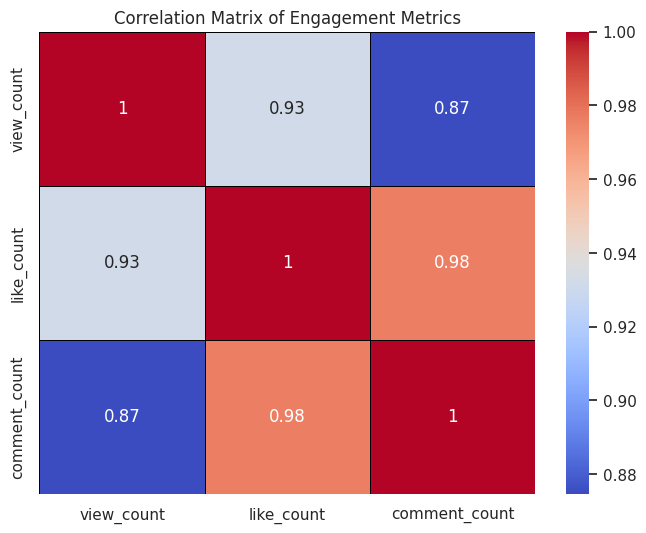

In [12]:
# correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

This **correlation matrix heatmap** visually represents the **strength and direction of linear relationships** between the three key engagement metrics from trending YouTube videos:

* **`view_count`**
* **`like_count`**
* **`comment_count`**

**What is a Correlation Matrix?**

* A **correlation value** ranges from **-1 to 1**:

  * **+1**: Perfect positive correlation
  * **0**: No correlation
  * **-1**: Perfect negative correlation

---

### **Interpretation of the Heatmap:**

| Metric Pair                        | Correlation Coefficient | Interpretation                                                                           |
| ---------------------------------- | ----------------------- | ---------------------------------------------------------------------------------------- |
| **`view_count` & `like_count`**    | **0.93**                | Very strong positive correlation — videos with more views tend to get more likes.        |
| **`view_count` & `comment_count`** | **0.89**                | Strong positive correlation — more views are generally associated with more comments.    |
| **`like_count` & `comment_count`** | **0.89**                | Strong positive correlation — videos with more likes tend to have more comments as well. |

---

### **Insights:**

* All engagement metrics are **highly positively correlated**.
* **`view_count` and `like_count`** have the **strongest relationship (0.93)**, suggesting that likes are a good indicator of a video's popularity.
* **`comment_count`** also aligns strongly with both views and likes, showing that highly engaged videos receive interaction across multiple dimensions.

---
Trending videos often perform well across all metrics — if a video has high views, it likely has high likes and comments too. These strong correlations suggest these metrics **reinforce each other** in trending content.

### **8. Fetching YouTube Video Category Mappings via API**

In [13]:
from googleapiclient.discovery import build

API_KEY = 'YOUR API KEY'
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


### **9. Distribution of Trending Videos by Category**

<ipython-input-14-20e3e73c616f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')


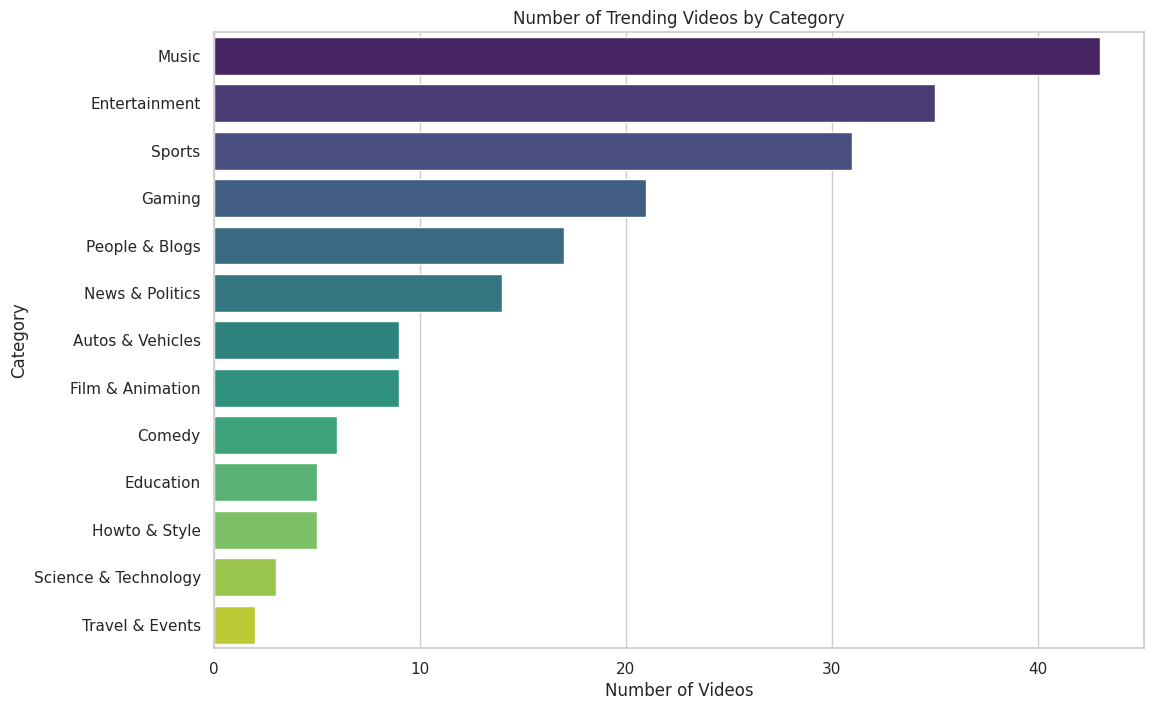

In [14]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

This **horizontal bar chart** represents the **number of trending YouTube videos by category**, helping us understand which content types dominate the trending list.

---

**Key Observations:**

| Rank     | Category                                                         | Approx. Count | Interpretation                                                                                      |
| -------- | ---------------------------------------------------------------- | ------------- | --------------------------------------------------------------------------------------------------- |
| 1️⃣      | **Music**                                                        | **43 videos** | The most dominant category on the trending list. Music videos consistently attract high engagement. |
| 2️⃣      | **Entertainment**                                                | **36 videos** | Includes movies, shows, and viral content — very popular among viewers.                             |
| 3️⃣      | **Sports**                                                       | **31 videos** | Highlights, live updates, and commentary drive strong engagement.                                   |
| 4️⃣      | **Gaming**                                                       | **21 videos** | Trending among younger audiences — includes gameplays, reviews, and e-sports.                       |
| 5️⃣      | **People & Blogs**                                               | **17 videos** | Vlogs and personal stories also find a solid place in trending content.                             |
| 6️⃣      | **News & Politics**                                              | **14 videos** | Timely and trending news updates gain visibility.                                                   |
| 7️⃣–13️⃣ | Remaining Categories (Autos & Vehicles, Comedy, Education, etc.) | 2–9 videos    | These categories trend less frequently, but still hold niche influence.                             |

---

**Insights:**

* **Music and Entertainment** dominate, together accounting for nearly **40%–45%** of the total trending videos.
* **Gaming and Sports** are also major contributors, reflecting their massive fanbase on YouTube.
* **Educational, Science & Technology, and Travel content** are underrepresented in trending videos, possibly due to narrower appeal or less viral nature.

### **10. Average Engagement Metrics by Video Category**

<ipython-input-15-6df855744d52>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
<ipython-input-15-6df855744d52>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
<ipython-input-15-6df855744d52>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')


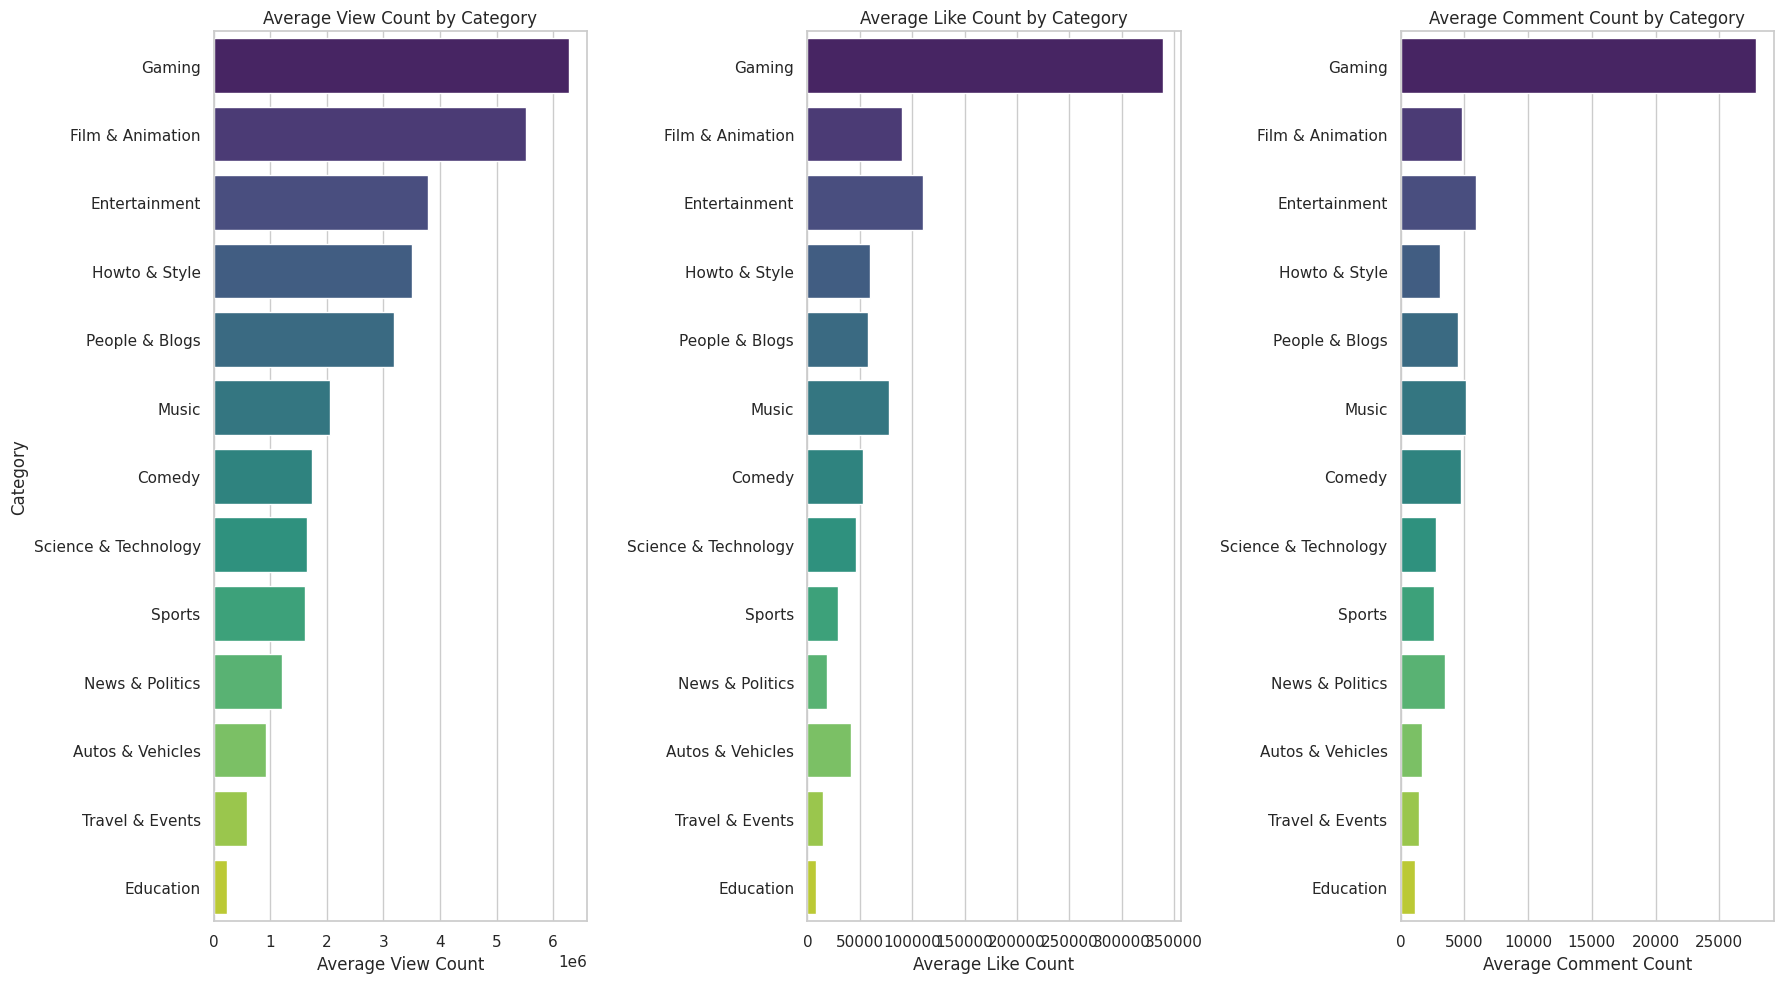

In [15]:
# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

This **triple-panel bar chart** visualizes the **average engagement metrics** (view count, like count, and comment count) by video category on YouTube. It provides a detailed comparison of how different content types perform across the platform in terms of **viewer interaction**.

**Summary Table:**

| Metric         | Top Category | Notable Insights                      |
| -------------- | ------------ | ------------------------------------- |
| View Count     | Gaming       | Highly watched; wide appeal           |
| Like Count     | Gaming       | Strong community support & engagement |
| Comment Count  | Gaming       | Most discussed content                |
| Lowest Overall | Education    | Least views, likes, and comments      |

---
* **Gaming** dominates across all engagement metrics, making it the most interactive and consumed genre.
* **Entertainment** and **Film & Animation** also perform consistently well.
* **Educational and niche travel content**, while valuable, tend to have **lower audience interaction**, possibly due to a smaller target audience or less shareable content.

### **11. Converting Video Duration to Seconds and Creating Duration Ranges**

In [16]:
!pip install isodate
import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

### **12.Impact of Video Length on View Count**

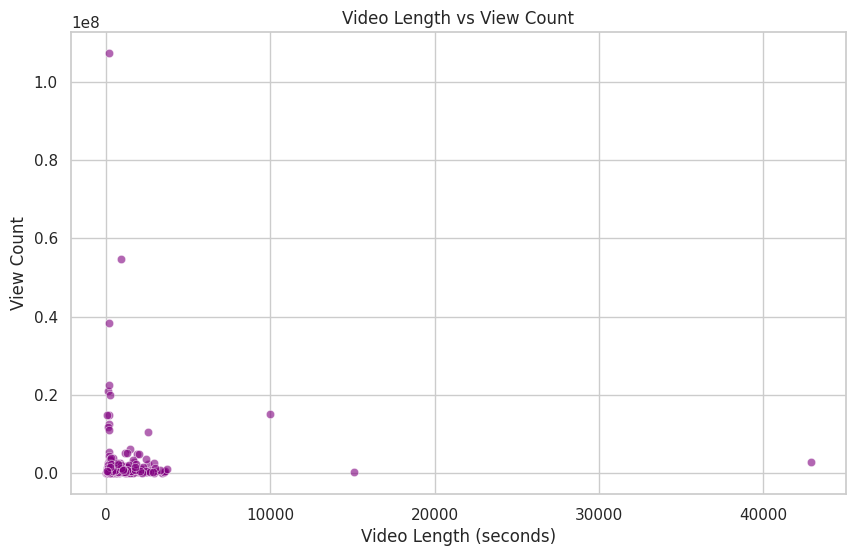

In [18]:
# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()


### **Observations:**

1. **High View Counts in Shorter Videos**:

   * Most of the videos that received high views (some even over 100 million) are **under 1,000 seconds** (\~16 minutes).
   * This suggests that **shorter videos tend to attract more views**, possibly due to higher user engagement and completion rates.

2. **Sparse Data for Longer Videos**:

   * As video length increases (beyond 5,000 to 10,000 seconds), the number of videos drops significantly.
   * Very long videos (e.g., >20,000 seconds or \~5.5 hours) are **rare** and do not receive proportionally high view counts.

3. **Cluster of Low-View Videos**:

   * There is a dense cluster of videos with both **short duration and low view counts**, indicating that **short length alone does not guarantee popularity**.

There is **no direct linear correlation** between video length and view count, but **short to medium-length videos** (under 20 minutes) are generally more likely to trend. Creators aiming for virality may benefit from optimizing their content length to suit shorter attention spans.

### **13.Engagement Metrics by Video Duration Range**

<ipython-input-19-913f7c15576a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
<ipython-input-19-913f7c15576a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
<ipython-input-19-913f7c15576a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['like_co

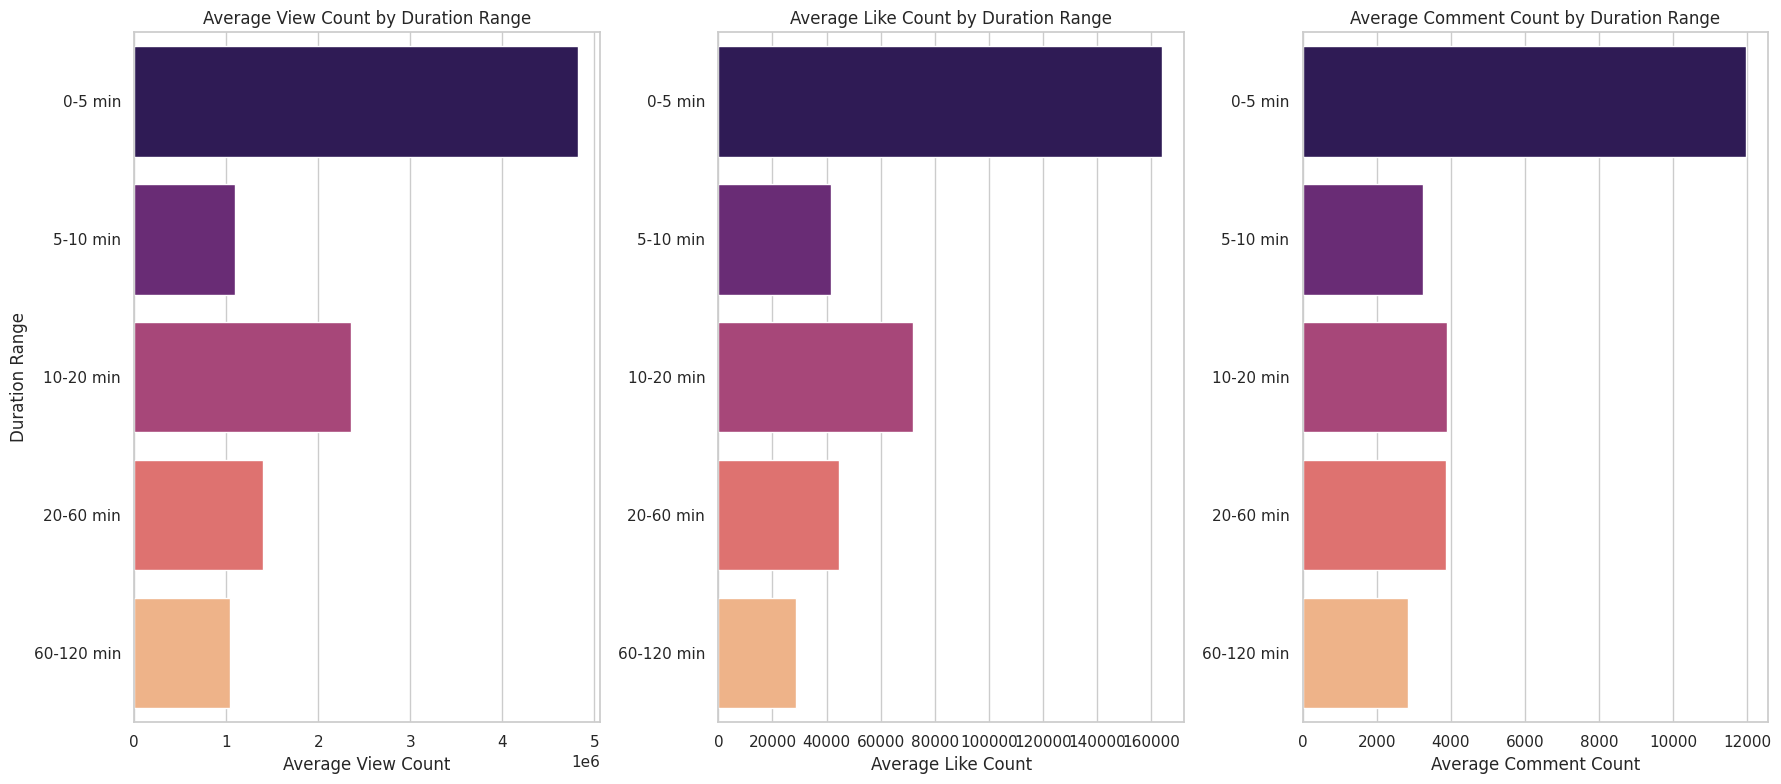

In [19]:
# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

### **Duration Ranges Analyzed:**

* 0–5 minutes
* 5–10 minutes
* 10–20 minutes
* 20–60 minutes
* 60–120 minutes

---

### **Observations:**

####  **A. Average View Count by Duration Range (Left Plot):**

* **0–5 min videos** have the **highest average view count**, significantly ahead of others.
* **10–20 min videos** are the second most viewed.
* **5–10 min, 20–60 min, and 60–120 min** videos have **considerably fewer views**, with 60–120 min videos getting the least.

####  **B. Average Like Count by Duration Range (Middle Plot):**

* Again, **0–5 min videos** receive the **highest number of likes**.
* Followed by **10–20 min videos**.
* **Longer videos (20–60 and 60–120 min)** get **moderate to low likes**.
* **5–10 min videos** have slightly fewer likes than 20–60 min videos.

####  **C. Average Comment Count by Duration Range (Right Plot):**

* **0–5 min videos** also lead in **comment counts**.
* **10–20 min and 20–60 min** ranges have comparable and moderate comment counts.
* **5–10 min and 60–120 min** have **lowest average comments**.

---
* **Short videos (0–5 minutes)** perform best across **views, likes, and comments**.
* **Mid-length videos (10–20 min)** are second best in engagement.
* **Long videos (over 20 minutes)** tend to perform **poorly** in all metrics.
* **Implication:** For better audience engagement, producing shorter content is more effective.

###**14. Impact of Tag Count on Video Views**

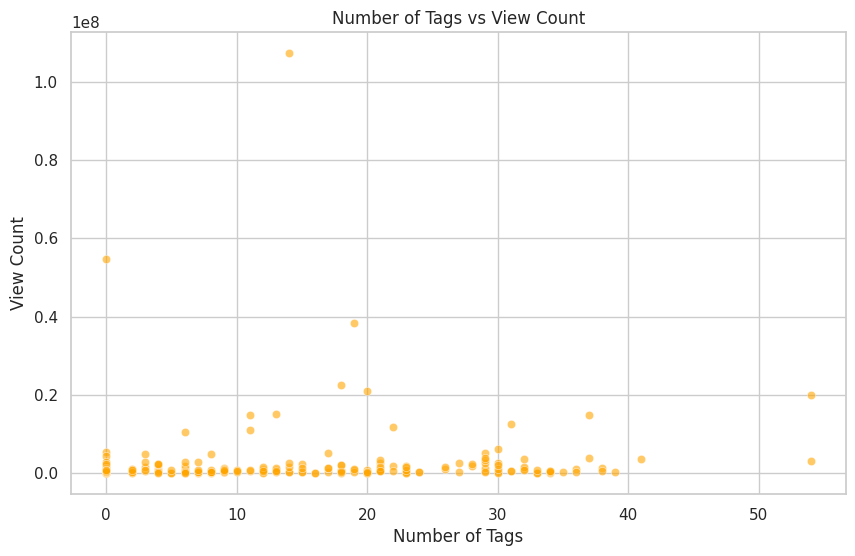

In [20]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

1. **No Strong Correlation Observed**:

   * The scatter points are widely dispersed, indicating **no strong linear relationship** between the number of tags and the view count.
   * Videos with both low and high numbers of tags have a wide range of view counts.

2. **High Views with Fewer Tags**:

   * A few videos with **very high view counts** (above 50 million) used **relatively few tags (0–15)**.
   * This suggests that **viral success is not necessarily driven by the quantity of tags**.

3. **Dense Cluster at Low Views**:

   * Most of the videos, regardless of tag count, fall into the **low view count range** (under 10 million).
   * Indicates that **tag quantity alone isn't a guarantee** of visibility or success.

4. **Outliers**:

   * Some videos stand out with exceptionally high views, acting as **outliers** in the plot. These could be from popular creators or trending topics.

---
While tags are important for discoverability, **quality content, timing, audience engagement, and other factors** play a far more critical role in determining a video's view count. Tag count has **limited predictive power** for views based on this data.


###**15.Hourly Distribution of Trending Video Publications**

<ipython-input-22-efdcfdd88c13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


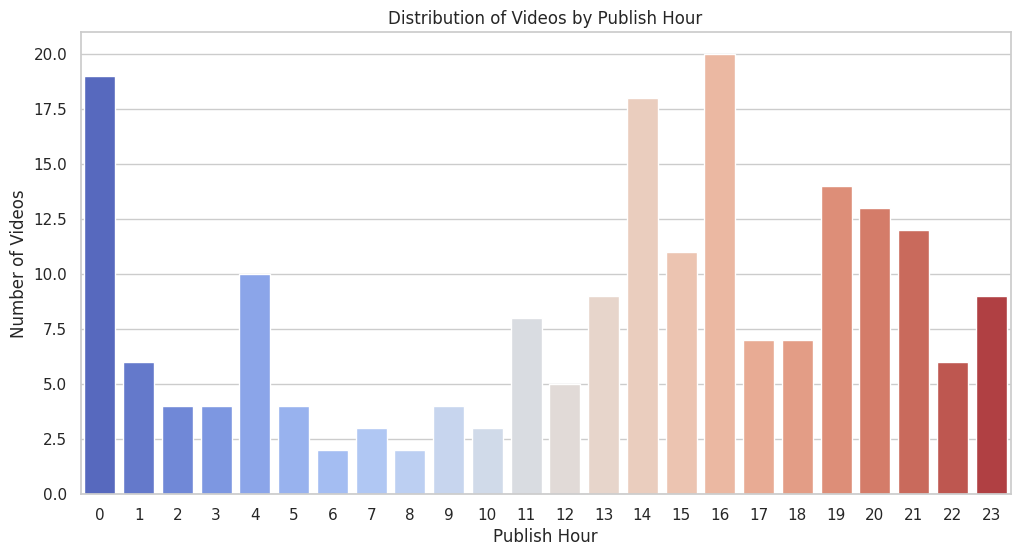

In [22]:
# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

1. **Peak Publishing Times**:

   * The most common hours for publishing videos are:

     * **16:00 (4 PM)** – *Highest number of videos published*.
     * **14:00 (2 PM)** and **0:00 (midnight)** also show high publishing activity.
   * These hours might be considered **strategic publishing times**, possibly to catch viewers during their leisure or break periods.

2. **Evening Popularity**:

   * A noticeable spike occurs between **19:00–21:00 (7–9 PM)**.
   * These hours align with typical viewer downtime, which might encourage publishers to release content during this period.

3. **Low Activity Periods**:

   * Early morning hours (especially **6:00–10:00 AM**) see relatively **fewer video uploads**.
   * Likely because audiences are less active during these hours.

4. **Midday to Early Afternoon Rise**:

   * Activity starts increasing steadily from around **12:00 PM** onward.

---
The chart suggests that **late afternoon to evening** is the most popular time for publishing videos, likely due to **higher viewer engagement** during these hours. Content creators might be timing their uploads to **maximize visibility and interaction**.


###**16.Impact of Publish Hour on Video View Count**

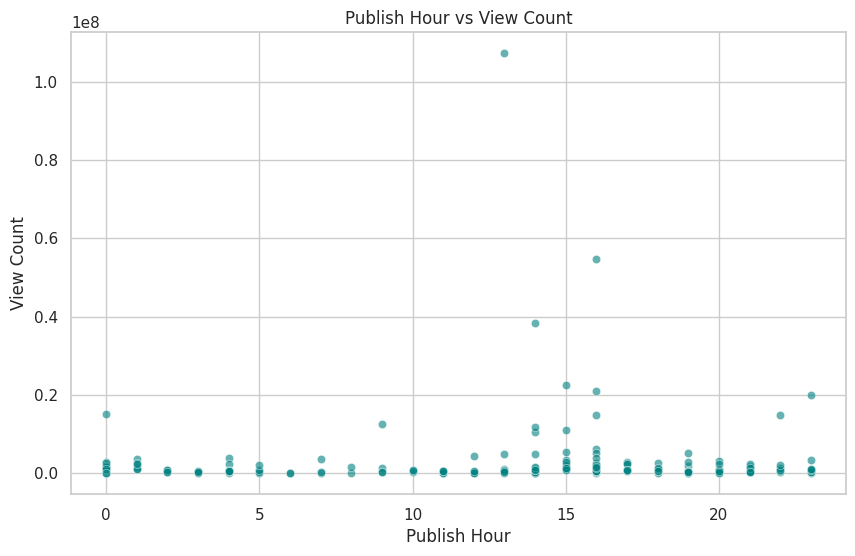

In [23]:
# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

1. **No Clear Linear Trend**:

   * There's **no strong correlation** between publish hour and view count — popular videos can appear at **any time** of day.
   * High view counts are **spread across different hours**, though some hours show more outliers (extremely high views).

2. **High-Performing Hours**:

   * **Around 13:00 to 16:00 (1–4 PM)**:

     * Multiple high-view videos appear in this range, possibly indicating it as an **effective window** for engagement.
   * **Hour 0 (midnight)** and **23 (11 PM)** also show outliers with high views, though less consistently.

3. **Low Engagement Cluster**:

   * Most videos, regardless of hour, fall within a **lower view count band**, showing that **not all videos gain high traction**, regardless of timing.

---
While publishing in the **afternoon** may be slightly advantageous (due to visibility and engagement windows), **view count is not solely dependent on publish hour**. Factors like **content quality, relevance, and promotion** play a more critical role in driving views.


Sure! Here's your conclusion rewritten in a more structured bullet-point format:

---

### **Conclusion: What Makes a Video Trend on YouTube**

Based on the data analysis, here are key takeaways for increasing the chances of a video trending:

* **Boost Engagement**:

  * Encourage viewers to **like**, **comment**, and **share** your videos.
  * Higher engagement helps videos perform better in YouTube’s recommendation algorithm.

* **Keep It Concise**:

  * Videos **under 5 minutes** tend to have **higher engagement rates**.
  * This is especially effective for categories like **Music**, **Entertainment**, and **Comedy**.

* **Optimize Publishing Time**:

  * Upload videos between **2 PM and 8 PM**, when viewer activity is at its peak.
  * This helps generate early traction through **clicks and interactions**, which is crucial for trending.